# Bag-of-words analysis of model cards

## Setup and Data Loading

In [1]:
import sys
print(sys.executable)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from wordcloud import WordCloud
import json
import ast

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set style for plots
plt.style.use('seaborn')
sns.set_palette('husl')

/opt/homebrew/anaconda3/envs/huggingface-collection/bin/python


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/benjaminlaufer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/benjaminlaufer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/benjaminlaufer/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/35/rbf5cr3s6wx53bzp489khqh40000gn/T/ipykernel_4147/4248894652.py:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# Load the dataset
#df = pd.read_csv('DeepHermes-3-Mistral-24B-Preview_finetunes_20250418_022302.csv')
df = pd.read_csv('DeepSeek-R1_finetunes_20250418_022531.csv')
#df = pd.read_csv('phi-2_finetunes_20250422_224221.csv')
#Sort the rows of the dataset by the 'depth' information contained within the column in descending order
df = df.sort_values(by='depth', ascending=True)

print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (303, 13)


,Unnamed: 0,model_id,card,metadata,depth,children,children_count,adapters,adapters_count,quantized,quantized_count,merges,merges_count
0,0,deepseek-ai/DeepSeek-R1,---\nlicense: mit\nlibrary_name: transformers\...,"{""modelId"": ""deepseek-ai/DeepSeek-R1"", ""sha"": ...",0,['https://huggingface.co/perplexity-ai/r1-1776...,299,"['https://huggingface.co/dpr1360/design', 'htt...",121,['https://huggingface.co/unsloth/DeepSeek-R1-G...,47,"['https://huggingface.co/degodslayer/Hoya', 'h...",2
205,205,AntVess/new74,---\nlicense: afl-3.0\nlanguage:\n- ru\nbase_m...,"{""modelId"": ""AntVess/new74"", ""sha"": ""45a181211...",1,[],0,[],0,[],0,[],0
204,204,jasonlinn/yilanpass,---\nbase_model:\n- deepseek-ai/DeepSeek-R1\n---,"{""modelId"": ""jasonlinn/yilanpass"", ""sha"": ""2ef...",1,[],0,[],0,[],0,[],0
203,203,JulienSunLib/Sunlib,---\nlanguage:\n- fr\nbase_model:\n- deepseek-...,"{""modelId"": ""JulienSunLib/Sunlib"", ""sha"": ""123...",1,[],0,[],0,[],0,[],0
202,202,FarhanisGoingTomakeaAi/NiteTalkbot,---\nlicense: afl-3.0\ndatasets:\n- open-thoug...,"{""modelId"": ""FarhanisGoingTomakeaAi/NiteTalkbo...",1,[],0,[],0,[],0,[],0


In [3]:
# Parse the text below to capture when the model was created
text_to_parse = ''''---\nlicense: mit\nlibrary_name: transformers\n---\n# DeepSeek-R1\n<!-- markdownlint-disable first-line-h1 -->\n<!-- markdownlint-disable html -->\n<!-- markdownlint-disable no-duplicate-header -->\n\n<div align="center">\n  <img src="https://github.com/deepseek-ai/DeepSeek-V2/blob/main/figures/logo.svg?raw=true" width="60%" alt="DeepSeek-V3" />\n</div>\n<hr>\n<div align="center" style="line-height: 1;">\n  <a href="https://www.deepseek.com/" target="_blank" style="margin: 2px;">\n    <img alt="Homepage" src="https://github.com/deepseek-ai/DeepSeek-V2/blob/main/figures/badge.svg?raw=true" style="display: inline-block; vertical-align: middle;"/>\n  </a>\n  <a href="https://chat.deepseek.com/" target="_blank" style="margin: 2px;">\n    <img alt="Chat" src="https://img.shields.io/badge/🤖%20Chat-DeepSeek%20R1-536af5?color=536af5&logoColor=white" style="display: inline-block; vertical-align: middle;"/>\n  </a>\n  <a href="https://huggingface.co/deepseek-ai" target="_blank" style="margin: 2px;">\n    <img alt="Hugging Face" src="https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-DeepSeek%20AI-ffc107?color=ffc107&logoColor=white" style="display: inline-block; vertical-align: middle;"/>\n  </a>\n</div>\n\n<div align="center" style="line-height: 1;">\n  <a href="https://discord.gg/Tc7c45Zzu5" target="_blank" style="margin: 2px;">\n    <img alt="Discord" src="https://img.shields.io/badge/Discord-DeepSeek%20AI-7289da?logo=discord&logoColor=white&color=7289da" style="display: inline-block; vertical-align: middle;"/>\n  </a>\n  <a href="https://github.com/deepseek-ai/DeepSeek-V2/blob/main/figures/qr.jpeg?raw=true" target="_blank" style="margin: 2px;">\n    <img alt="Wechat" src="https://img.shields.io/badge/WeChat-DeepSeek%20AI-brightgreen?logo=wechat&logoColor=white" style="display: inline-block; vertical-align: middle;"/>\n  </a>\n  <a href="https://twitter.com/deepseek_ai" target="_blank" style="margin: 2px;">\n    <img alt="Twitter Follow" src="https://img.shields.io/badge/Twitter-deepseek_ai-white?logo=x&logoColor=white" style="display: inline-block; vertical-align: middle;"/>\n  </a>\n</div>\n\n<div align="center" style="line-height: 1;">\n  <a href="https://github.com/deepseek-ai/DeepSeek-R1/blob/main/LICENSE" style="margin: 2px;">\n    <img alt="License" src="https://img.shields.io/badge/License-MIT-f5de53?&color=f5de53" style="display: inline-block; vertical-align: middle;"/>\n  </a>\n</div>\n\n\n<p align="center">\n  <a href="https://github.com/deepseek-ai/DeepSeek-R1/blob/main/DeepSeek_R1.pdf"><b>Paper Link</b>👁️</a>\n</p>\n\n\n## 1. Introduction\n\nWe introduce our first-generation reasoning models, DeepSeek-R1-Zero and DeepSeek-R1. \nDeepSeek-R1-Zero, a model trained via large-scale reinforcement learning (RL) without supervised fine-tuning (SFT) as a preliminary step, demonstrated remarkable performance on reasoning.\nWith RL, DeepSeek-R1-Zero naturally emerged with numerous powerful and interesting reasoning behaviors.\nHowever, DeepSeek-R1-Zero encounters challenges such as endless repetition, poor readability, and language mixing. To address these issues and further enhance reasoning performance,\nwe introduce DeepSeek-R1, which incorporates cold-start data before RL.\nDeepSeek-R1 achieves performance comparable to OpenAI-o1 across math, code, and reasoning tasks. \nTo support the research community, we have open-sourced DeepSeek-R1-Zero, DeepSeek-R1, and six dense models distilled from DeepSeek-R1 based on Llama and Qwen. DeepSeek-R1-Distill-Qwen-32B outperforms OpenAI-o1-mini across various benchmarks, achieving new state-of-the-art results for dense models.\n\n**NOTE: Before running DeepSeek-R1 series models locally, we kindly recommend reviewing the [Usage Recommendation](#usage-recommendations) section.**\n\n<p align="center">\n  <img width="80%" src="figures/benchmark.jpg">\n</p>\n\n## 2. Model Summary\n\n---\n\n**Post-Training: Large-Scale Reinforcement Learning on the Base Model**\n\n-  We directly apply reinforcement learning (RL) to the base model without relying on supervised fine-tuning (SFT) as a preliminary step. This approach allows the model to explore chain-of-thought (CoT) for solving complex problems, resulting in the development of DeepSeek-R1-Zero. DeepSeek-R1-Zero demonstrates capabilities such as self-verification, reflection, and generating long CoTs, marking a significant milestone for the research community. Notably, it is the first open research to validate that reasoning capabilities of LLMs can be incentivized purely through RL, without the need for SFT. This breakthrough paves the way for future advancements in this area.\n\n-   We introduce our pipeline to develop DeepSeek-R1. The pipeline incorporates two RL stages aimed at discovering improved reasoning patterns and aligning with human preferences, as well as two SFT stages that serve as the seed for the model\'s reasoning and non-reasoning capabilities.\n    We believe the pipeline will benefit the industry by creating better models. \n\n---\n\n**Distillation: Smaller Models Can Be Powerful Too**\n\n-  We demonstrate that the reasoning patterns of larger models can be distilled into smaller models, resulting in better performance compared to the reasoning patterns discovered through RL on small models. The open source DeepSeek-R1, as well as its API, will benefit the research community to distill better smaller models in the future. \n- Using the reasoning data generated by DeepSeek-R1, we fine-tuned several dense models that are widely used in the research community. The evaluation results demonstrate that the distilled smaller dense models perform exceptionally well on benchmarks. We open-source distilled 1.5B, 7B, 8B, 14B, 32B, and 70B checkpoints based on Qwen2.5 and Llama3 series to the community.\n\n## 3. Model Downloads\n\n### DeepSeek-R1 Models\n\n<div align="center">\n\n| **Model** | **#Total Params** | **#Activated Params** | **Context Length** | **Download** |\n| :------------: | :------------: | :------------: | :------------: | :------------: |\n| DeepSeek-R1-Zero | 671B | 37B | 128K   | [🤗 HuggingFace](https://huggingface.co/deepseek-ai/DeepSeek-R1-Zero)   |\n| DeepSeek-R1   | 671B | 37B |  128K   | [🤗 HuggingFace](https://huggingface.co/deepseek-ai/DeepSeek-R1)   |\n\n</div>\n\nDeepSeek-R1-Zero & DeepSeek-R1 are trained based on DeepSeek-V3-Base. \nFor more details regarding the model architecture, please refer to [DeepSeek-V3](https://github.com/deepseek-ai/DeepSeek-V3) repository.\n\n### DeepSeek-R1-Distill Models\n\n<div align="center">\n\n| **Model** | **Base Model** | **Download** |\n| :------------: | :------------: | :------------: |\n| DeepSeek-R1-Distill-Qwen-1.5B  | [Qwen2.5-Math-1.5B](https://huggingface.co/Qwen/Qwen2.5-Math-1.5B) | [🤗 HuggingFace](https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B)   |\n| DeepSeek-R1-Distill-Qwen-7B  | [Qwen2.5-Math-7B](https://huggingface.co/Qwen/Qwen2.5-Math-7B) | [🤗 HuggingFace](https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Qwen-7B)   |\n| DeepSeek-R1-Distill-Llama-8B  | [Llama-3.1-8B](https://huggingface.co/meta-llama/Llama-3.1-8B) | [🤗 HuggingFace](https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Llama-8B)   |\n| DeepSeek-R1-Distill-Qwen-14B   | [Qwen2.5-14B](https://huggingface.co/Qwen/Qwen2.5-14B) | [🤗 HuggingFace](https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Qwen-14B)   |\n|DeepSeek-R1-Distill-Qwen-32B  | [Qwen2.5-32B](https://huggingface.co/Qwen/Qwen2.5-32B) | [🤗 HuggingFace](https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Qwen-32B)   |\n| DeepSeek-R1-Distill-Llama-70B  | [Llama-3.3-70B-Instruct](https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct) | [🤗 HuggingFace](https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Llama-70B)   |\n\n</div>\n\nDeepSeek-R1-Distill models are fine-tuned based on open-source models, using samples generated by DeepSeek-R1.\nWe slightly change their configs and tokenizers. Please use our setting to run these models.\n\n## 4. Evaluation Results\n\n### DeepSeek-R1-Evaluation\n For all our models, the maximum generation length is set to 32,768 tokens. For benchmarks requiring sampling, we use a temperature of $0.6$, a top-p value of $0.95$, and generate 64 responses per query to estimate pass@1.\n<div align="center">\n\n\n| Category | Benchmark (Metric) | Claude-3.5-Sonnet-1022 | GPT-4o 0513 | DeepSeek V3 | OpenAI o1-mini | OpenAI o1-1217 | DeepSeek R1 |\n|----------|-------------------|----------------------|------------|--------------|----------------|------------|--------------|\n| | Architecture | - | - | MoE | - | - | MoE |\n| | # Activated Params | - | - | 37B | - | - | 37B |\n| | # Total Params | - | - | 671B | - | - | 671B |\n| English | MMLU (Pass@1) | 88.3 | 87.2 | 88.5 | 85.2 | **91.8** | 90.8 |\n| | MMLU-Redux (EM) | 88.9 | 88.0 | 89.1 | 86.7 | - | **92.9** |\n| | MMLU-Pro (EM) | 78.0 | 72.6 | 75.9 | 80.3 | - | **84.0** |\n| | DROP (3-shot F1) | 88.3 | 83.7 | 91.6 | 83.9 | 90.2 | **92.2** |\n| | IF-Eval (Prompt Strict) | **86.5** | 84.3 | 86.1 | 84.8 | - | 83.3 |\n| | GPQA-Diamond (Pass@1) | 65.0 | 49.9 | 59.1 | 60.0 | **75.7** | 71.5 |\n| | SimpleQA (Correct) | 28.4 | 38.2 | 24.9 | 7.0 | **47.0** | 30.1 |\n| | FRAMES (Acc.) | 72.5 | 80.5 | 73.3 | 76.9 | - | **82.5** |\n| | AlpacaEval2.0 (LC-winrate) | 52.0 | 51.1 | 70.0 | 57.8 | - | **87.6** |\n| | ArenaHard (GPT-4-1106) | 85.2 | 80.4 | 85.5 | 92.0 | - | **92.3** |\n| Code | LiveCodeBench (Pass@1-COT) | 33.8 | 34.2 | - | 53.8 | 63.4 | **65.9** |\n| | Codeforces (Percentile) | 20.3 | 23.6 | 58.7 | 93.4 | **96.6** | 96.3 |\n| | Codeforces (Rating) | 717 | 759 | 1134 | 1820 | **2061** | 2029 |\n| | SWE Verified (Resolved) | **50.8** | 38.8 | 42.0 | 41.6 | 48.9 | 49.2 |\n| | Aider-Polyglot (Acc.) | 45.3 | 16.0 | 49.6 | 32.9 | **61.7** | 53.3 |\n| Math | AIME 2024 (Pass@1) | 16.0 | 9.3 | 39.2 | 63.6 | 79.2 | **79.8** |\n| | MATH-500 (Pass@1) | 78.3 | 74.6 | 90.2 | 90.0 | 96.4 | **97.3** |\n| | CNMO 2024 (Pass@1) | 13.1 | 10.8 | 43.2 | 67.6 | - | **78.8** |\n| Chinese | CLUEWSC (EM) | 85.4 | 87.9 | 90.9 | 89.9 | - | **92.8** |\n| | C-Eval (EM) | 76.7 | 76.0 | 86.5 | 68.9 | - | **91.8** |\n| | C-SimpleQA (Correct) | 55.4 | 58.7 | **68.0** | 40.3 | - | 63.7 |\n\n</div>\n\n\n### Distilled Model Evaluation\n\n\n<div align="center">\n\n| Model                                    | AIME 2024 pass@1 | AIME 2024 cons@64 | MATH-500 pass@1 | GPQA Diamond pass@1 | LiveCodeBench pass@1 | CodeForces rating |\n|------------------------------------------|------------------|-------------------|-----------------|----------------------|----------------------|-------------------|\n| GPT-4o-0513                          | 9.3              | 13.4              | 74.6            | 49.9                 | 32.9                 | 759               |\n| Claude-3.5-Sonnet-1022             | 16.0             | 26.7                 | 78.3            | 65.0                 | 38.9                 | 717               |\n| o1-mini                              | 63.6             | 80.0              | 90.0            | 60.0                 | 53.8                 | **1820**          |\n| QwQ-32B-Preview                              | 44.0             | 60.0                 | 90.6            | 54.5               | 41.9                 | 1316              |\n| DeepSeek-R1-Distill-Qwen-1.5B       | 28.9             | 52.7              | 83.9            | 33.8                 | 16.9                 | 954               |\n| DeepSeek-R1-Distill-Qwen-7B          | 55.5             | 83.3              | 92.8            | 49.1                 | 37.6                 | 1189              |\n| DeepSeek-R1-Distill-Qwen-14B         | 69.7             | 80.0              | 93.9            | 59.1                 | 53.1                 | 1481              |\n| DeepSeek-R1-Distill-Qwen-32B        | **72.6**         | 83.3              | 94.3            | 62.1                 | 57.2                 | 1691              |\n| DeepSeek-R1-Distill-Llama-8B         | 50.4             | 80.0              | 89.1            | 49.0                 | 39.6                 | 1205              |\n| DeepSeek-R1-Distill-Llama-70B        | 70.0             | **86.7**          | **94.5**        | **65.2**             | **57.5**             | 1633              |\n\n</div>\n\n\n## 5. Chat Website & API Platform\nYou can chat with DeepSeek-R1 on DeepSeek\'s official website: [chat.deepseek.com](https://chat.deepseek.com), and switch on the button "DeepThink"\n\nWe also provide OpenAI-Compatible API at DeepSeek Platform: [platform.deepseek.com](https://platform.deepseek.com/)\n\n## 6. How to Run Locally\n\n### DeepSeek-R1 Models\n\nPlease visit [DeepSeek-V3](https://github.com/deepseek-ai/DeepSeek-V3) repo for more information about running DeepSeek-R1 locally.\n\n**NOTE: Hugging Face\'s Transformers has not been directly supported yet.**\n\n### DeepSeek-R1-Distill Models\n\nDeepSeek-R1-Distill models can be utilized in the same manner as Qwen or Llama models.\n\nFor instance, you can easily start a service using [vLLM](https://github.com/vllm-project/vllm):\n\n```shell\nvllm serve deepseek-ai/DeepSeek-R1-Distill-Qwen-32B --tensor-parallel-size 2 --max-model-len 32768 --enforce-eager\n```\n\nYou can also easily start a service using [SGLang](https://github.com/sgl-project/sglang)\n\n```bash\npython3 -m sglang.launch_server --model deepseek-ai/DeepSeek-R1-Distill-Qwen-32B --trust-remote-code --tp 2\n```\n\n### Usage Recommendations\n\n**We recommend adhering to the following configurations when utilizing the DeepSeek-R1 series models, including benchmarking, to achieve the expected performance:**\n\n1. Set the temperature within the range of 0.5-0.7 (0.6 is recommended) to prevent endless repetitions or incoherent outputs.\n2. **Avoid adding a system prompt; all instructions should be contained within the user prompt.**\n3. For mathematical problems, it is advisable to include a directive in your prompt such as: "Please reason step by step, and put your final answer within \\boxed{}."\n4. When evaluating model performance, it is recommended to conduct multiple tests and average the results.\n\nAdditionally, we have observed that the DeepSeek-R1 series models tend to bypass thinking pattern (i.e., outputting "\\<think\\>\\n\\n\\</think\\>") when responding to certain queries, which can adversely affect the model\'s performance.\n**To ensure that the model engages in thorough reasoning, we recommend enforcing the model to initiate its response with "\\<think\\>\\n" at the beginning of every output.**\n\n## 7. License\nThis code repository and the model weights are licensed under the [MIT License](https://github.com/deepseek-ai/DeepSeek-R1/blob/main/LICENSE).\nDeepSeek-R1 series support commercial use, allow for any modifications and derivative works, including, but not limited to, distillation for training other LLMs. Please note that:\n- DeepSeek-R1-Distill-Qwen-1.5B, DeepSeek-R1-Distill-Qwen-7B, DeepSeek-R1-Distill-Qwen-14B and DeepSeek-R1-Distill-Qwen-32B are derived from [Qwen-2.5 series](https://github.com/QwenLM/Qwen2.5), which are originally licensed under [Apache 2.0 License](https://huggingface.co/Qwen/Qwen2.5-1.5B/blob/main/LICENSE), and now finetuned with 800k samples curated with DeepSeek-R1.\n- DeepSeek-R1-Distill-Llama-8B is derived from Llama3.1-8B-Base and is originally licensed under [llama3.1 license](https://huggingface.co/meta-llama/Llama-3.1-8B/blob/main/LICENSE).\n- DeepSeek-R1-Distill-Llama-70B is derived from Llama3.3-70B-Instruct and is originally licensed under [llama3.3 license](https://huggingface.co/meta-llama/Llama-3.3-70B-Instruct/blob/main/LICENSE).\n\n## 8. Citation\n```\n@misc{deepseekai2025deepseekr1incentivizingreasoningcapability,\n      title={DeepSeek-R1: Incentivizing Reasoning Capability in LLMs via Reinforcement Learning}, \n      author={DeepSeek-AI},\n      year={2025},\n      eprint={2501.12948},\n      archivePrefix={arXiv},\n      primaryClass={cs.CL},\n      url={https://arxiv.org/abs/2501.12948}, \n}\n\n```\n\n## 9. Contact\nIf you have any questions, please raise an issue or contact us at [service@deepseek.com](service@deepseek.com).\n'
'''

def capture_created_at_date(text):
    created_at_date = re.search(r'Created at: (\d{4}-\d{2}-\d{2})', text)


In [4]:
text = ''''{"modelId": "deepseek-ai/DeepSeek-R1", "sha": "56d4cbbb4d29f4355bab4b9a39ccb717a14ad5ad", "tags": ["transformers", "safetensors", "deepseek_v3", "text-generation", "conversational", "custom_code", "arxiv:2501.12948", "license:mit", "autotrain_compatible", "endpoints_compatible", "fp8", "region:us"], "downloads": 1675064, "pipeline_tag": "text-generation"}'
'''

text


'\'{"modelId": "deepseek-ai/DeepSeek-R1", "sha": "56d4cbbb4d29f4355bab4b9a39ccb717a14ad5ad", "tags": ["transformers", "safetensors", "deepseek_v3", "text-generation", "conversational", "custom_code", "arxiv:2501.12948", "license:mit", "autotrain_compatible", "endpoints_compatible", "fp8", "region:us"], "downloads": 1675064, "pipeline_tag": "text-generation"}\'\n'

## Text Preprocessing

In [5]:
def preprocess_text(text):
    """Preprocess text for bag-of-words analysis."""
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


In [6]:
df

,Unnamed: 0,model_id,card,metadata,depth,children,children_count,adapters,adapters_count,quantized,quantized_count,merges,merges_count
0,0,deepseek-ai/DeepSeek-R1,---\nlicense: mit\nlibrary_name: transformers\...,"{""modelId"": ""deepseek-ai/DeepSeek-R1"", ""sha"": ...",0,['https://huggingface.co/perplexity-ai/r1-1776...,299,"['https://huggingface.co/dpr1360/design', 'htt...",121,['https://huggingface.co/unsloth/DeepSeek-R1-G...,47,"['https://huggingface.co/degodslayer/Hoya', 'h...",2
205,205,AntVess/new74,---\nlicense: afl-3.0\nlanguage:\n- ru\nbase_m...,"{""modelId"": ""AntVess/new74"", ""sha"": ""45a181211...",1,[],0,[],0,[],0,[],0
204,204,jasonlinn/yilanpass,---\nbase_model:\n- deepseek-ai/DeepSeek-R1\n---,"{""modelId"": ""jasonlinn/yilanpass"", ""sha"": ""2ef...",1,[],0,[],0,[],0,[],0
203,203,JulienSunLib/Sunlib,---\nlanguage:\n- fr\nbase_model:\n- deepseek-...,"{""modelId"": ""JulienSunLib/Sunlib"", ""sha"": ""123...",1,[],0,[],0,[],0,[],0
202,202,FarhanisGoingTomakeaAi/NiteTalkbot,---\nlicense: afl-3.0\ndatasets:\n- open-thoug...,"{""modelId"": ""FarhanisGoingTomakeaAi/NiteTalkbo...",1,[],0,[],0,[],0,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,12,rash1dovt/tyncha_ai,---\nlicense: apache-2.0\ndatasets:\n- nvidia/...,"{""modelId"": ""rash1dovt/tyncha_ai"", ""sha"": ""800...",2,[],0,[],0,[],0,[],0
201,201,persadian/Croptimize,---\nlicense: other\nlicense_name: darjyo\nlic...,"{""modelId"": ""persadian/Croptimize"", ""sha"": ""c9...",2,[],0,[],0,[],0,[],0
39,39,mradermacher/DeepSeek-R1-Pruned-Coder-411B-GGUF,---\nbase_model: huihui-ai/DeepSeek-R1-Pruned-...,"{""modelId"": ""mradermacher/DeepSeek-R1-Pruned-C...",2,[],0,[],0,[],0,[],0
8,8,Suziwan/Model1,---\nbase_model:\n- perplexity-ai/r1-1776\n---,"{""modelId"": ""Suziwan/Model1"", ""sha"": ""cd90c048...",2,[],0,[],0,[],0,[],0


## Bag-of-Words Analysis

In [7]:
# Create bag-of-words representation
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['card'])

# Get feature names and counts
feature_names = vectorizer.get_feature_names_out()
word_counts = X.sum(axis=0).A1

# Create DataFrame of word frequencies
word_freq = pd.DataFrame({
    'word': feature_names,
    'count': word_counts
}).sort_values('count', ascending=False)

# Display top 20 words
word_freq.head(20)

,word,count
262,deepseek,2179
766,r1,1628
896,the,1062
446,information,1001
573,more,948
567,model,941
584,needed,894
383,gguf,858
419,https,749
123,and,701


# TF-IDF analysis

In [8]:
# Instead of pure bag of words, use tf-idf to weight the words

from sklearn.feature_extraction.text import TfidfVectorizer

# Create a tf-idf representation of the model cards
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df['card'])

# Get feature names and counts
feature_names = tfidf_vectorizer.get_feature_names_out()
word_counts_tfidf = X_tfidf.sum(axis=0).A1

# Create a DataFrame of word frequencies
word_freq_tfidf = pd.DataFrame({
    'word': feature_names,
    'count': word_counts_tfidf
}).sort_values('count', ascending=False)

# What does the "count" column represent?
# It represents the tf-idf score for each word
# The tf-idf score is a measure of how important a word is to a document in a collection of documents
# It is the product of the term frequency (tf) and the inverse document frequency (idf)
# The tf is the number of times a word appears in a document divided by the total number of words in the document
# The idf is the logarithm of the total number of documents divided by the number of documents that contain the word
# The tf-idf score is a measure of how important a word is to a document in a collection of documents


#word_freq_tfidf[:50]


## Visualization

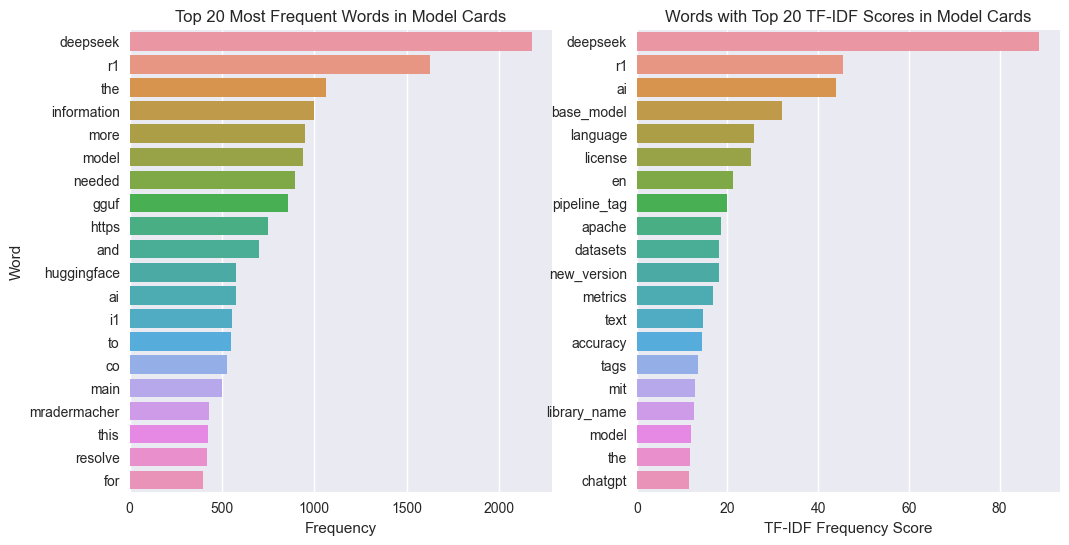

In [9]:
#Create two side-by-side bar plots of the top 20 words, one using bag of words and one using tf-idf

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot top 20 words overall using bag of words
sns.barplot(data=word_freq.head(20), x='count', y='word', ax=axes[0])
axes[0].set_title('Top 20 Most Frequent Words in Model Cards')
#plt.xlabel('TF-IDF Frequency Score')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Word')

# Plot top 20 words in terms of score using tf-idf
sns.barplot(data=word_freq_tfidf.head(20), x='count', y='word', ax=axes[1])
axes[1].set_title('Words with Top 20 TF-IDF Scores in Model Cards')
axes[1].set_xlabel('TF-IDF Frequency Score')
axes[1].set_ylabel('')

plt.show()



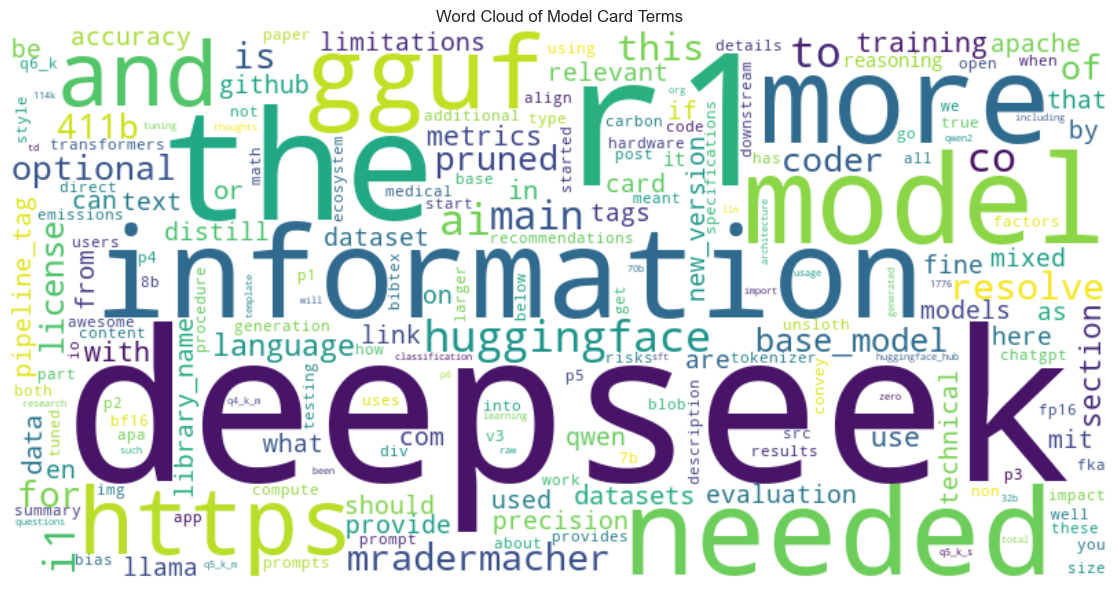

In [10]:
# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(word_freq['word'], word_freq['count']))
)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Model Card Terms')
plt.tight_layout()
plt.show()

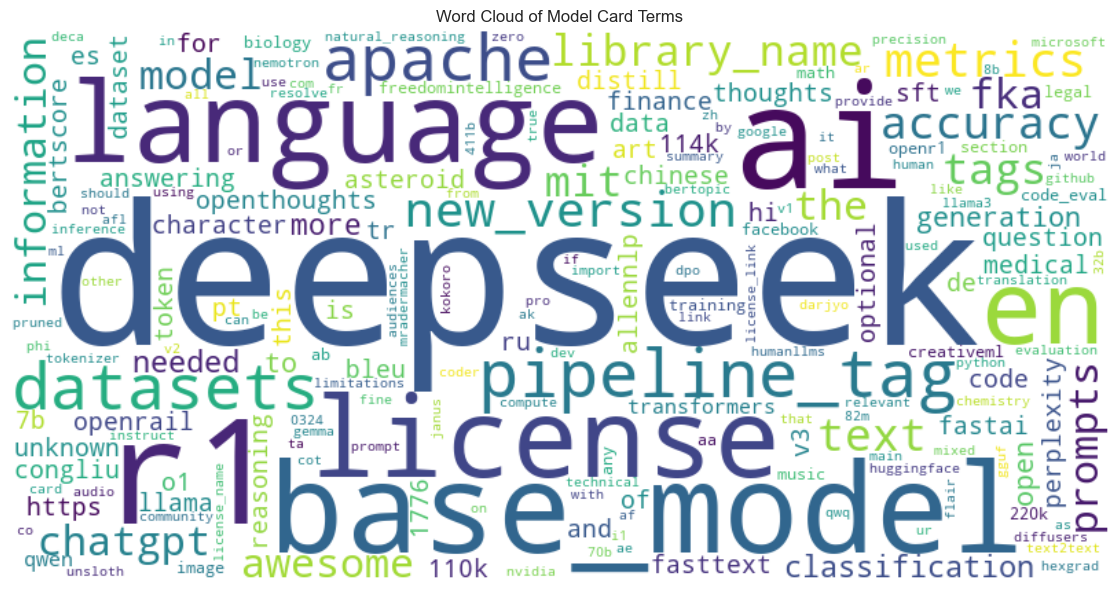

In [11]:
# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(word_freq_tfidf['word'], word_freq_tfidf['count']))
)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Model Card Terms')
plt.tight_layout()
plt.show()

## Analysis by Model Type

In [12]:
# Extract model type from model_id
df['model_type'] = df['model_id'].apply(lambda x: x.split('/')[-1].split('-')[0] if isinstance(x, str) else '')

# Group by model type and analyze word frequencies
model_types = df['model_type'].unique()
for model_type in model_types:
    if model_type:  # Skip empty model types
        type_data = df[df['model_type'] == model_type]
        if len(type_data) > 0:
            X_type = vectorizer.transform(type_data['card'])
            word_counts_type = X_type.sum(axis=0).A1
            
            word_freq_type = pd.DataFrame({
                'word': feature_names,
                'count': word_counts_type
            }).sort_values('count', ascending=False)
            
            print(f"\nTop 10 words for {model_type} models:")
            print(word_freq_type.head(10))


Top 10 words for DeepSeek models:
             word  count
262      deepseek   1287
766            r1   1126
383          gguf    858
419         https    632
429            i1    556
423   huggingface    534
222            co    508
532          main    475
574  mradermacher    432
791       resolve    420

Top 10 words for new74 models:
            word  count
446  information     44
573         more     41
584       needed     40
896          the     30
567        model     27
619     optional     15
904         this     15
913           to     13
123          and     12
475           is     11

Top 10 words for yilanpass models:
           word  count
262    deepseek      2
766          r1      1
167  base_model      1
110          ai      1
663    part2of5      0
664    part2of6      0
665    part2of8      0
666    part3of3      0
673    part4of6      0
662    part2of4      0

Top 10 words for Sunlib models:
             word  count
262      deepseek      2
766            r1     

# Measure the semantic similarity between model cards

In [13]:
#import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# If the df is length n, create an n x n matrix of similarity scores between each pair of model cards

similarity_matrix = np.zeros((len(df), len(df)))

#We know that the similarity matrix is symmetric, so we only need to calculate the upper triangle
for i in range(len(df)):
    for j in range(i+1, len(df)):
        similarity_matrix[i, j] = cosine_similarity(X_tfidf[i], X_tfidf[j])
        similarity_matrix[j, i] = similarity_matrix[i, j]



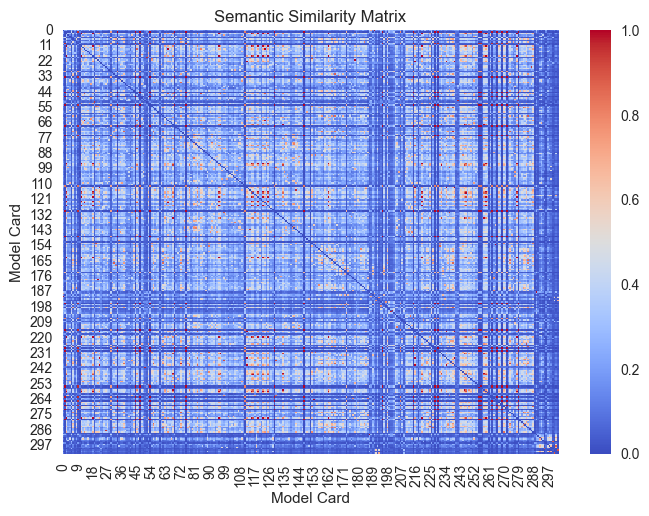

In [14]:
# Visualize the similarity matrix as a heatmap
sns.heatmap(similarity_matrix, annot=False, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Semantic Similarity Matrix')
plt.xlabel('Model Card')
plt.ylabel('Model Card')
plt.show()

In [15]:
# Now create two side-by-side heatmaps of the similarity, one using bag of words and one using tf-idf

similarity_matrix_bag_of_words = np.zeros((len(df), len(df)))

#We know that the similarity matrix is symmetric, so we only need to calculate the upper triangle
for i in range(len(df)):
    if i % 25 == 0:
        print(f"Calculating similarity for model {i} of {len(df)}")
    for j in range(i+1, len(df)):
        similarity_matrix_bag_of_words[i, j] = cosine_similarity(X[i], X[j])
        similarity_matrix_bag_of_words[j, i] = similarity_matrix_bag_of_words[i, j]


Calculating similarity for model 0 of 303
Calculating similarity for model 25 of 303
Calculating similarity for model 50 of 303
Calculating similarity for model 75 of 303
Calculating similarity for model 100 of 303
Calculating similarity for model 125 of 303
Calculating similarity for model 150 of 303
Calculating similarity for model 175 of 303
Calculating similarity for model 200 of 303
Calculating similarity for model 225 of 303
Calculating similarity for model 250 of 303
Calculating similarity for model 275 of 303
Calculating similarity for model 300 of 303


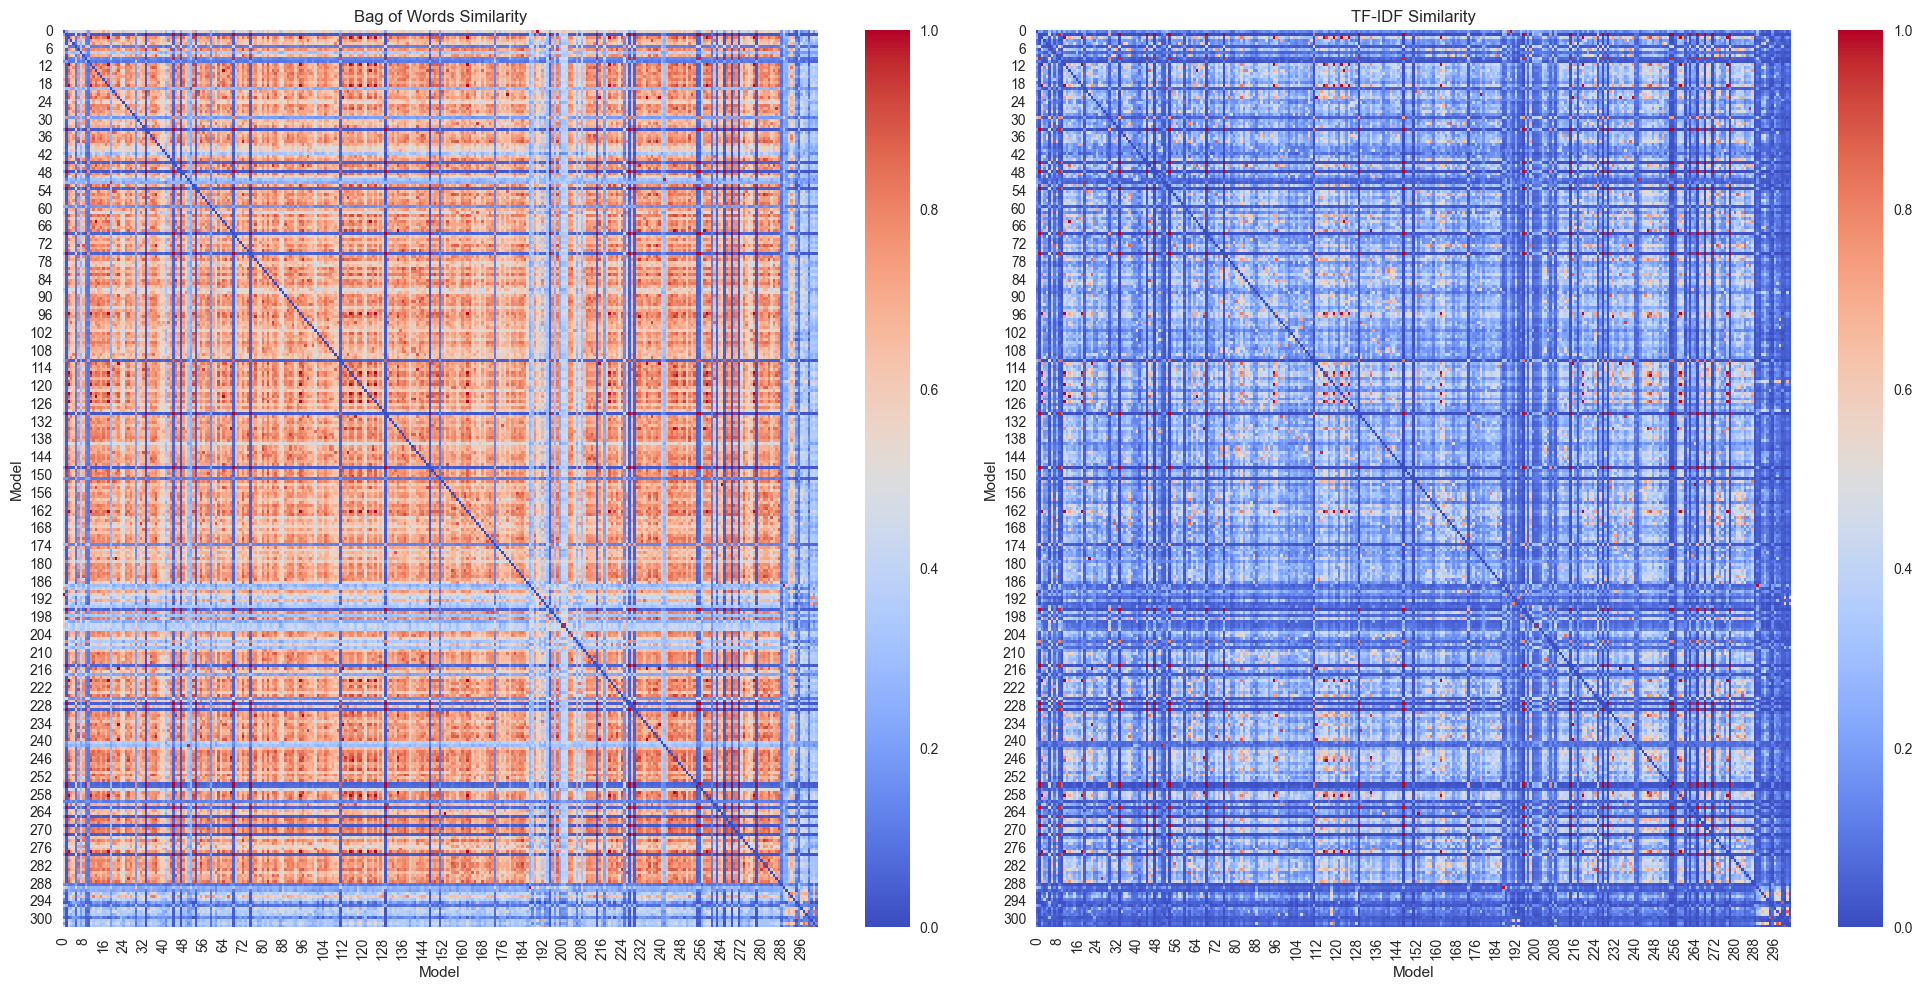

In [16]:
# Now plot the similarity matrices
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(similarity_matrix_bag_of_words, annot=False, cmap='coolwarm', vmin=0, vmax=1, ax=axes[0])
axes[0].set_title('Bag of Words Similarity')
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Model')

sns.heatmap(similarity_matrix, annot=False, cmap='coolwarm', vmin=0, vmax=1, ax=axes[1])
axes[1].set_title('TF-IDF Similarity')
axes[1].set_xlabel('Model')
axes[1].set_ylabel('Model')

plt.tight_layout()
plt.show()

# Vector embeddings

In [ ]:
# Now we move beyond bag-of-words and tf-idf. Import the necessary libraries
from sentence_transformers import SentenceTransformer

# Load the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create a sentence transformer representation of the model cards
df['sentence_transformer'] = df['card'].apply(lambda x: model.encode(x))

# Now we can use the sentence transformer representation to calculate the cosine similarity between model cards
similarity_matrix_sentence_transformer = np.zeros((len(df), len(df)))

# We know that the similarity matrix is symmetric, so we only need to calculate the upper triangle
for i in range(len(df)):
    for j in range(i+1, len(df)):
        similarity_matrix_sentence_transformer[i, j] = cosine_similarity(df['sentence_transformer'][i], df['sentence_transformer'][j])
        similarity_matrix_sentence_transformer[j, i] = similarity_matrix_sentence_transformer[i, j]

ModuleNotFoundError: No module named 'sentence_transformers'